In [71]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential

In [72]:
import h5py
import numpy as np

h5f = h5py.File('SVHN_single_grey1.h5')

x_train = h5f['X_train'][:]
x_test = h5f['X_test'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]

h5f.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

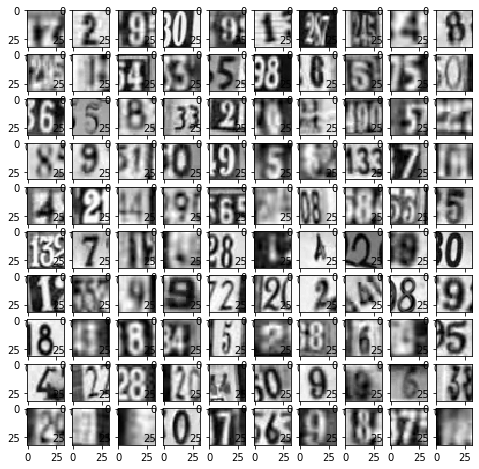

In [9]:
w = 10
h = 10
fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')

In [36]:
x_train.shape

(42000, 32, 32)

In [37]:
import cv2

In [38]:
x_train_res = np.zeros((x_train.shape[0],28,28), dtype=np.float32)

for i in range(x_train.shape[0]):
    x_train_res[i,:,:] = cv2.resize(x_train[i], dsize=(28,28), interpolation = cv2.INTER_CUBIC)

x_test_res = np.zeros((x_test.shape[0],28,28), dtype=np.float32)
for i in range(x_test.shape[0]):
    x_test_res[i,:,:] = cv2.resize(x_test[i], dsize=(28,28), interpolation = cv2.INTER_CUBIC)

In [39]:
x_train_res.shape

(42000, 28, 28)

In [40]:
x_test_res.shape

(18000, 28, 28)

In [41]:
del x_train
del x_test

In [42]:
x_train = x_train_res.reshape(x_train_res.shape[0], 28, 28,1)
x_test = x_test_res.reshape(x_test_res.shape[0], 28,28,1)
input_shape = (28,28, 1)

In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [44]:
x_train /= 255
x_test /= 255

In [45]:
batch_size = 120
epochs = 15
num_classes = 10

In [46]:
y_train[0]

2

In [47]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [49]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:

keras.backend.clear_session()
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), activation='relu', input_shape=input_shape, name='conv_1'))

model.add(Conv2D(64, kernel_size= (3,3), activation='relu',name='conv_2'))

model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))

model.add(Dropout(0.25, name='drop_1'))

model.add(Flatten())

model.add(Dense(128, activation='relu',name='dense_1'))

model.add(Dropout(0.5, name='drop_2'))

model.add(Dense(num_classes, activation='softmax', name='dense_2'))

In [70]:
'dense' not in model.layers[5].name

False

In [63]:
for layer in model.layers:
    if('dense' not in layer.name):
        layer.trainable = False

from termcolor import colored

for layer in model.layers:
    print(colored(layer.name, 'blue'))
    print(colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
pooling_1
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_2
True


In [64]:
model.load_weights('mnist_weights.h5')

In [65]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.001)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [66]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 36s 845us/step - loss: 2.6841 - accuracy: 0.1038 - val_loss: 2.3543 - val_accuracy: 0.1064
Epoch 2/15
42000/42000 [==============================] - 33s 782us/step - loss: 2.3767 - accuracy: 0.1078 - val_loss: 2.3155 - val_accuracy: 0.1144
Epoch 3/15
42000/42000 [==============================] - 31s 748us/step - loss: 2.3237 - accuracy: 0.1136 - val_loss: 2.2890 - val_accuracy: 0.1231
Epoch 4/15
42000/42000 [==============================] - 29s 697us/step - loss: 2.2983 - accuracy: 0.1190 - val_loss: 2.2716 - val_accuracy: 0.1332
Epoch 5/15
42000/42000 [==============================] - 31s 732us/step - loss: 2.2835 - accuracy: 0.1234 - val_loss: 2.2563 - val_accuracy: 0.1401
Epoch 6/15
42000/42000 [==============================] - 30s 714us/step - loss: 2.2687 - accuracy: 0.1294 - val_loss: 2.2371 - val_accuracy: 0.1530
Epoch 7/15
42000/42000 [==============================] 

KeyboardInterrupt: 